# Exploratory Data Analysis 1

### Imports

In [1]:
import pandas as pd
import sys
import os

current_dir = os.getcwd()

# Define the project root relative to the current working directory
project_root = os.path.abspath(os.path.join(current_dir, "../"))  # Adjust this based on your folder structure

# Add project_root to sys.path
sys.path.append(project_root)

from src.preprocessing.data_cleaning import CountMissingValues, VisualizeMissingValues, DropMissingValues, TextCleaning, PreviewDataValues, DuplicateValues, DropDuplicateValues, TextRatingCleaning, WrongTextInDataframeCleaning
from src.visualization.eda_visualization import TextLengthDistribution, WordCountDistribution, CommonWordsDistribution

### Loading the data

In [ ]:
data_path = '../data/raw/yelp.csv'
df = pd.read_csv(data_path)
df

,text,rating,date,location
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
2650,NaN,NaN,NaN,NaN
2651,NaN,NaN,NaN,NaN
2652,NaN,NaN,NaN,NaN
2653,NaN,NaN,NaN,NaN


### Preview The Data

In [3]:
display(PreviewDataValues().execute(df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2655 entries, 0 to 2654
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      166 non-null    object
 1   rating    534 non-null    object
 2   date      286 non-null    object
 3   location  518 non-null    object
dtypes: object(4)
memory usage: 83.1+ KB


(  text rating date location
 0  NaN    NaN  NaN      NaN
 1  NaN    NaN  NaN      NaN
 2  NaN    NaN  NaN      NaN
 3  NaN    NaN  NaN      NaN
 4  NaN    NaN  NaN      NaN,
 None,
                                                      text         rating  \
 count                                                 166            534   
 unique                                                 22              7   
 top     <span class=" raw__09f24__T4Ezm">299 Sussex St...  4 star rating   
 freq                                                   56            215   
 
                date  location  
 count           286       518  
 unique           21        23  
 top     Dec 4, 2024  Location  
 freq             56        56  )

In [4]:
print(f"Duplicate rows: {DuplicateValues().execute(df)}")


Duplicate rows: 2560


In [5]:
print("Missing Values Count:")
print(CountMissingValues().execute(df))

Missing Values Count:
text        2489
rating      2121
date        2369
location    2137
dtype: int64


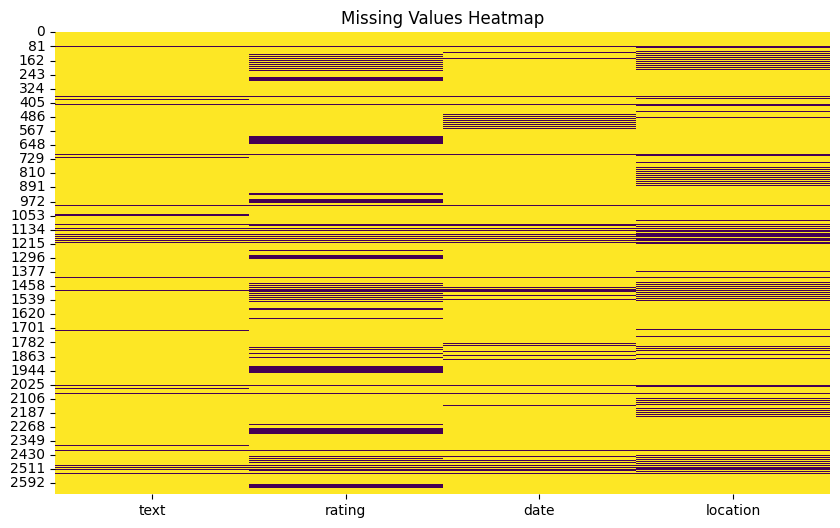

None


In [6]:
print(VisualizeMissingValues().execute(df))

### Initial Cleaning of the data

In [7]:
# Process the DataFrame
df = DropMissingValues().execute(df)

# Display the result
print(df)

                                                   text         rating  \
37    <span class=" raw__09f24__T4Ezm">299 Sussex St...  5 star rating   
38    <span class=" raw__09f24__T4Ezm">299 Sussex St...  5 star rating   
80    <span class=" raw__09f24__T4Ezm" lang="en">Del...  5 star rating   
81    <span class=" raw__09f24__T4Ezm" lang="en">Del...  5 star rating   
83    <span class=" raw__09f24__T4Ezm" lang="en">Del...  5 star rating   
...                                                 ...            ...   
2489  <span class=" raw__09f24__T4Ezm" lang="en">Ver...  1 star rating   
2501  <span class=" raw__09f24__T4Ezm" lang="en">Thi...  5 star rating   
2512  <span class=" raw__09f24__T4Ezm" lang="en">We ...  4 star rating   
2523  <span class=" raw__09f24__T4Ezm" lang="en">We ...  5 star rating   
2535  <span class=" raw__09f24__T4Ezm" lang="en">We ...  3 star rating   

              date                                           location  
37     Dec 4, 2024  I've tried a range 

In [8]:
print("Missing Values Count:")
print(CountMissingValues().execute(df))

Missing Values Count:
text        0
rating      0
date        0
location    0
dtype: int64


In [9]:
df = DropDuplicateValues().execute(df)

print(df)

                                                   text         rating  \
37    <span class=" raw__09f24__T4Ezm">299 Sussex St...  5 star rating   
80    <span class=" raw__09f24__T4Ezm" lang="en">Del...  5 star rating   
108   <span class=" raw__09f24__T4Ezm" lang="en">Del...  5 star rating   
119   <span class=" raw__09f24__T4Ezm" lang="en">Cam...  3 star rating   
131   <span class=" raw__09f24__T4Ezm" lang="en">unf...  1 star rating   
143   <span class=" raw__09f24__T4Ezm" lang="en">Foo...  4 star rating   
155   <span class=" raw__09f24__T4Ezm" lang="en">Gre...  4 star rating   
166   <span class=" raw__09f24__T4Ezm" lang="en">Rea...  5 star rating   
177   <span class=" raw__09f24__T4Ezm" lang="en">Cam...  4 star rating   
189   <span class=" raw__09f24__T4Ezm" lang="en">The...  4 star rating   
200   <span class=" raw__09f24__T4Ezm" lang="en">We ...  5 star rating   
212   <span class=" raw__09f24__T4Ezm" lang="en">Ove...  5 star rating   
331                                   

In [10]:
print(f"Duplicate rows: {DuplicateValues().execute(df)}")

Duplicate rows: 0


In [11]:
df = TextCleaning().execute(df)
print(df)

                                                   text         rating  \
37       <span class=" raw__09f24__T4Ezm">299 Sussex St  5 star rating   
80    Delicious Thai restaurant!  If you're looking ...  5 star rating   
108   Delicious Thai restaurant!  If you're looking ...  5 star rating   
119   Came here on Valentine, and the foods were goo...  3 star rating   
131   unfortunately my husband reacts to msg (ajinom...  1 star rating   
143   Food was delicious...the only drawback is the ...  4 star rating   
155   Great place for Thai food and just as long as ...  4 star rating   
166   Really good Thai food.  Large portions and ful...  5 star rating   
177   Came here looklng for Indonesian food for dinn...  4 star rating   
189   The food is good and the people are nice. The ...  4 star rating   
200   We were hungry and we when in and this was abs...  5 star rating   
212   Overall food was good. I enjoyed the papaya sa...  5 star rating   
331                                   

In [12]:
df = TextRatingCleaning().execute(df)
print(df)

                                                   text  rating          date  \
37       <span class=" raw__09f24__T4Ezm">299 Sussex St      5    Dec 4, 2024   
80    Delicious Thai restaurant!  If you're looking ...      5    Dec 4, 2024   
108   Delicious Thai restaurant!  If you're looking ...      5    Dec 4, 2024   
119   Came here on Valentine, and the foods were goo...      3   Feb 15, 2025   
131   unfortunately my husband reacts to msg (ajinom...      1   Oct 25, 2024   
143   Food was delicious...the only drawback is the ...      4    Jan 7, 2025   
155   Great place for Thai food and just as long as ...      4    Feb 6, 2024   
166   Really good Thai food.  Large portions and ful...      5    Jan 2, 2024   
177   Came here looklng for Indonesian food for dinn...      4   Feb 22, 2024   
189   The food is good and the people are nice. The ...      4   Mar 29, 2024   
200   We were hungry and we when in and this was abs...      5   Aug 24, 2022   
212   Overall food was good.

In [13]:
df = WrongTextInDataframeCleaning().execute(df)
print(df)

                                                   text rating          date  \
108   Delicious Thai restaurant!  If you're looking ...     5    Dec 4, 2024   
119   Came here on Valentine, and the foods were goo...     3   Feb 15, 2025   
131   unfortunately my husband reacts to msg (ajinom...     1   Oct 25, 2024   
143   Food was delicious...the only drawback is the ...     4    Jan 7, 2025   
155   Great place for Thai food and just as long as ...     4    Feb 6, 2024   
166   Really good Thai food.  Large portions and ful...     5    Jan 2, 2024   
177   Came here looklng for Indonesian food for dinn...     4   Feb 22, 2024   
189   The food is good and the people are nice. The ...     4   Mar 29, 2024   
200   We were hungry and we when in and this was abs...     5   Aug 24, 2022   
212   Overall food was good. I enjoyed the papaya sa...     5    Jan 1, 2024   
2431  Nice food, large portions and low prices. I re...     5   Dec 14, 2023   
2442  Authentic Thai flavoursEven on a W

In [14]:
df

,text,rating,date,location
108,Delicious Thai restaurant! If you're looking ...,5,"Dec 4, 2024","Temecula, CA"
119,"Came here on Valentine, and the foods were goo...",3,"Feb 15, 2025","Jacksonville, FL"
131,unfortunately my husband reacts to msg (ajinom...,1,"Oct 25, 2024","Kailua, HI"
143,Food was delicious...the only drawback is the ...,4,"Jan 7, 2025","San Rafael, CA"
155,Great place for Thai food and just as long as ...,4,"Feb 6, 2024","San Clemente, CA"
166,Really good Thai food. Large portions and ful...,5,"Jan 2, 2024","Cupertino, CA"
177,Came here looklng for Indonesian food for dinn...,4,"Feb 22, 2024","Portishead, United Kingdom"
189,The food is good and the people are nice. The ...,4,"Mar 29, 2024","Lakeside, CA"
200,We were hungry and we when in and this was abs...,5,"Aug 24, 2022","Calgary, Canada"
212,Overall food was good. I enjoyed the papaya sa...,5,"Jan 1, 2024","Champaign, IL"


In [15]:
print("Missing Values Count:")
print(CountMissingValues().execute(df))

Missing Values Count:
text        0
rating      0
date        0
location    0
dtype: int64


### Visualizing the initialy cleaned data

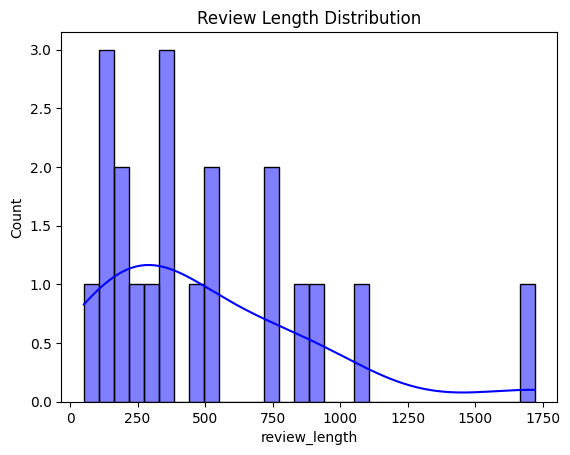

None


In [16]:
print(TextLengthDistribution().execute(df))

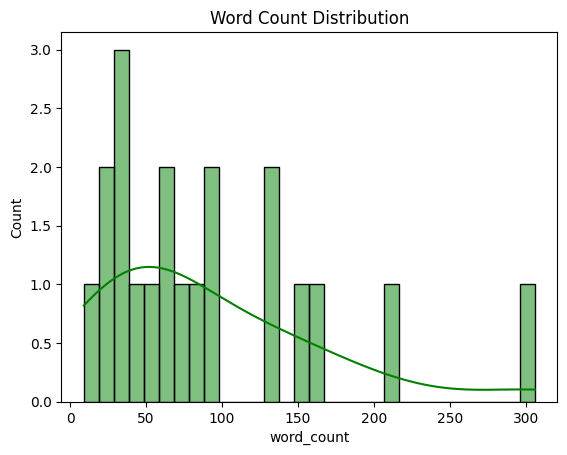

None


In [17]:
print(WordCountDistribution().execute(df))

C:\Users\Geeneth\Desktop\Code\Machine Learning\PycharmProjects\Advanced Sentiment Analysis\src\visualization\eda_visualization.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=common_words, x='Frequency', y='Word', palette='coolwarm')


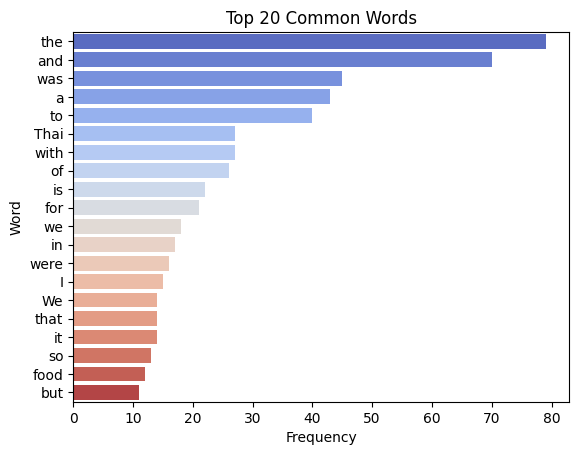

None


In [18]:
print(CommonWordsDistribution().execute(df))


In [19]:
df

,text,rating,date,location,review_length,word_count
108,Delicious Thai restaurant! If you're looking ...,5,"Dec 4, 2024","Temecula, CA",198,33
119,"Came here on Valentine, and the foods were goo...",3,"Feb 15, 2025","Jacksonville, FL",485,82
131,unfortunately my husband reacts to msg (ajinom...,1,"Oct 25, 2024","Kailua, HI",733,131
143,Food was delicious...the only drawback is the ...,4,"Jan 7, 2025","San Rafael, CA",165,26
155,Great place for Thai food and just as long as ...,4,"Feb 6, 2024","San Clemente, CA",345,69
166,Really good Thai food. Large portions and ful...,5,"Jan 2, 2024","Cupertino, CA",336,59
177,Came here looklng for Indonesian food for dinn...,4,"Feb 22, 2024","Portishead, United Kingdom",509,98
189,The food is good and the people are nice. The ...,4,"Mar 29, 2024","Lakeside, CA",129,29
200,We were hungry and we when in and this was abs...,5,"Aug 24, 2022","Calgary, Canada",162,32
212,Overall food was good. I enjoyed the papaya sa...,5,"Jan 1, 2024","Champaign, IL",224,39


In [20]:
df.loc[108]

text             Delicious Thai restaurant!  If you're looking ...
rating                                                          5 
date                                                   Dec 4, 2024
location                                              Temecula, CA
review_length                                                  198
word_count                                                      33
Name: 108, dtype: object

### Saving the initially cleaned dataset

In [ ]:
df.to_csv('../data/cleaned/cleaned_reviews.csv', index=False)